# Question 1

Below is the sensory agent we intoduced in class. In this question, you will add 3 instance variables to the sensory agent particle. The variables are: self.temperature_state, self.food_state, and self.sensors. 

## 1a 5pts.
If you recall from class, sensors is a list of [x , y] grid coordinates of each sensors position, relative to the agent itself. So if the agent is at position 1, 1, and it has 4 sensors, those sensors might be located above it, at position [1, 0], below it, at position [1, 2], and next to it at positions [0, 1] or [2, 1]. In this case, self.sensors would be [[1, 0], [1, 2], [0, 1], [2, 1]]. 

Add code to generate self.sensors in the sensory agent class below. It should be a list that is l = n_sensors*n_sensors long, containing l elements, each of which is relative x and y coordinates. Note, 4 sensors in the paragraph above corresponds to the total number of sensors, in the case discussed here, n_sensors refers to the number of x positions and y positions in some square sensor grid. 

Your code only needs to be well-defined for the n_sensors = 3 case (as this is a 3 x 3 grid perfectly surrounding the particle), but it's worth thinking about the more general case -- e.g if you wanted a 5 x 5 grid. Up to 2 pts of extra credit can be awarded for clever general solutions. 


## 1b 5pts.

self.temperature_state and self.food_state are each n_sensors x n_sensors arrays, where the results of sensing the environment with sensors at the locations specified by self.sensors will be stored. Initialize empty sensor arrays self.temperature_state and self.food_state.


Hint: if you do not solve these questions more or less completely, the simulation in the code cell below the agent definition will not run. You may still have an incorrect answer if the simulation runs, for example you could have a correct length self.sensors list, but the sensors might be in a 3x3 grid around you. I recommend looking closely at the output of the simulation, once it's running, to make sure it's correct. 

# Question 2

Now we will help the agent use it's eyes!
## 2a 5pts.

First we have to define two new helper functions, self.move_hotter() and self.move_colder(). In each of these functions you have to 1. sense the temperature in the grid around you. 2. find the <colder/hotter> direction, 3. move in that direction. A few key points:

You can access self.sensors, self.temperature_state, and self.v. 
Do not remove self.consume() from the beginning of each function, moving costs food!

As with last weeks homework, it might take some mucking around to figure out exactly how much you should change the particles velocity. I recommend having the particles keep some momentum (so dont totally reset the velocity), instead only do some combination of slowing down the particles external momentum, then adding some internal momentum based on where the particle wants to go. You can just reset the particles velocity entirely, but that tends to lead to particles flying everywhere, or getting totally stuck. This part might be frustrating, but it's important to look at the output of the simulation, and get it to behave how you want it to, even if it seems like the changes are arbitrary, and your logic was correct. Sometimes little bits of fine-tuning make a big difference, especially if you are trying to replicate some qualitative animal or human behavior. You will probably have to finish this fine tuning after completing the next subpart. 


## 2b 3pts.

In the self.advance function, call self.move_hotter() or self.move_colder() depending on whether the agent is too hot or too cold. 

## 2c 2pts.

Add logic for the agent to determine when it eats! This is open-ended, there isn't a "right" answer. I suggested basing it off of the foodstore in class, but you could also eat randomly, or eat only if you havent eaten recently, or even eat based off of the density of food you sense in the environment. 


I uploaded a short video of my solution. You can see how the agent stays put in the center of the environment, until it gets too cold, then quickly moves to a warmer zone. NOTE for this assingment please uploade a short clip of your particle by setting save=True in sim.do_animation(). This will take quite a while to save so I recommend only saving after you are hapy with your particles behavior

In [5]:
from collision import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
class sensory_agent(Particle):
    """A class representing a two-dimensional particle."""
    def __init__(self, x = .5, y = .5, vx = 0, vy=0, radius = .05, styles = 
                 {'edgecolor': 'k', 'linewidth': 2, 'alpha': 1, 'facecolor': 'k'} , 
                 food_store = 100, n_sensors = 3):
        
        #%%  Code for 1a and 1b goes here      
        self.sensors = None
        self.temperature_state = None
        self.food_state = None
        #%%
        
        
        #standard constructors, no need to change
        self.r = np.array((x, y)).astype('float32')
        self.v = np.array((vx, vy)).astype('float32')
        self.hidden_radius = radius
        self.radius = 2.5*radius
        self.mass = self.radius**2
        self.delete = False
        self.styles = styles
        if not self.styles:
            # Default circle styles
            self.styles = {'edgecolor': 'c', 'fill': False}
        self.food_store = food_store
        self.temperature = 98; 
        self.set_point = 98 #homeostatic temp
        self.margin =  .5
        self.last_temp = 98
        self.last_vel = np.array((vx, vy)).astype('float32')
        
        self.eat = False
        self.temp_log = []
        self.food_log = []
        self.grad_log = []
    
    def homeostasis_monitor(self):
        return self.temperature - self.set_point
    def temp_change_monitor(self):
        return self.temperature - self.last_temp
    
    #this function you dont need to change but might be interested in, this is how we eat other particles!
    def overlaps(self, other):
        """Does the circle of this Particle overlap that of other?"""
        overlap = np.hypot(*(self.r - other.r)) < (self.radius + other.radius)
        
        if self.eat and overlap:
            other.delete = True
            other.radius = 0
            self.food_store += 1
            self.eat = False          
        return overlap
  
    
    def consume(self):  
        self.food_store -= .1;

         
    def move(self, dt):
        self.r += self.v * dt
        
    
    def move_colder(self, dt):
        self.consume()
        #your code goes here
        pass
        #
        
    def move_hotter(self, dt):
        self.consume()
        #your code goes here
        pass 
        
    def advance(self, dt):
        """Advance the Particle's position forward in time by dt."""
        
        #do basic functions
        #check internal state
        dtemp = self.homeostasis_monitor()
        
        if abs(dtemp) > self.margin:
            #part 2b code goes here
            pass
                
         
        # part 2c code goes here, update this conditional statement so the particle decides when to eat
        condition = True
        if condition:
            self.eat = True
        else:
            self.eat = False
        
        #
        
        self.move(dt)
        self.exist(dt)
        
    #plotting garbage
    def draw(self, ax):
        """Add this Particle's Circle patch to the Matplotlib Axes ax."""

        circle = Path.circle(center = self.r, radius = self.hidden_radius)#Circle(xy=self.r, radius=self.radius, **self.styles)
        patch = patches.PathPatch(circle, facecolor = None, lw=2, path_effects=[
        patheffects.withTickedStroke(angle=-90, spacing=8, length=2)]);  
        ax.add_patch(patch)
        
        return patch
            
    #exist
    def exist(self, dt):
        
        self.grad_log.append(np.sign(self.v[0]))   
        self.temp_log.append(self.temperature)
        self.food_log.append(self.food_store)
        self.last_temp = self.temperature
        self.last_vel = self.v
        #this means we're dead!
        if self.food_store < 0:
            self.delete = True
        if self.temperature < 90 or self.temperature > 105:
            self.delete = True

In [7]:
from collision import sensory_environment

p = sensory_agent()
sim = sensory_environment(n = 2)
sim.particles.insert(0, p)

<IPython.core.display.Javascript object>


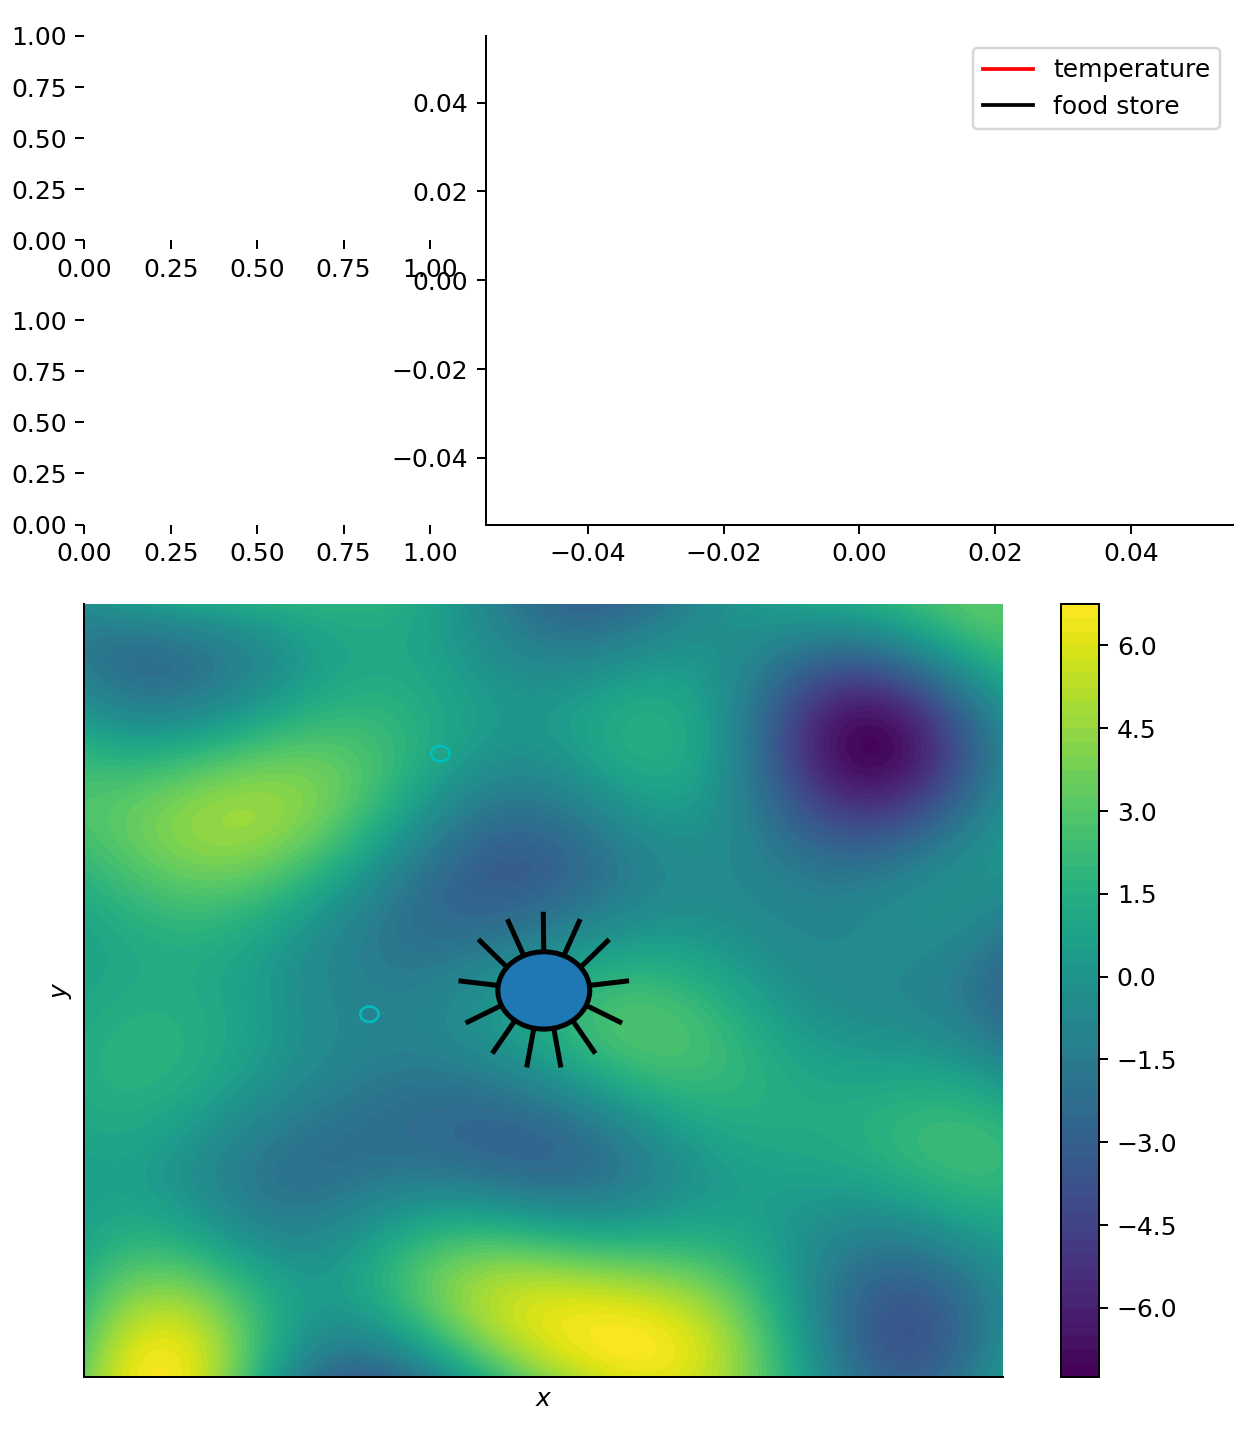

In [8]:
%matplotlib notebook

sim.do_animation(save=False)